In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

In [137]:
mydata = pd.read_csv(r"C:\Users\U1138371\Documents\Capstone Project\Code\data_to_clean.csv")

In [138]:
mydata.sample(3)

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing
6327,4e0bb01e-5554-452e-8107-9c386982ab67,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,29,F,CHEST,PA,WSD,1024,1024,0.143
12303,7dd7ae0c-bea8-4b2e-89e9-c6f55ce0529a,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,65,M,CHEST,PA,WSD,1024,1024,0.143
9070,6495b54d-fceb-4463-8eb0-94dab230e043,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,61,F,CHEST,AP,WSD,1024,1024,0.168


In [139]:
mydata.drop(['width', 'height', 'BodyPartExamined','Rows','Columns','PixelSpacing','x','y'], axis =1)

,patientId,Target,class,Modality,PatientAge,PatientSex,ViewPosition,ConversionType
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,No Lung Opacity / Not Normal,CR,51,F,PA,WSD
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,No Lung Opacity / Not Normal,CR,48,F,PA,WSD
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,No Lung Opacity / Not Normal,CR,19,M,AP,WSD
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal,CR,28,M,PA,WSD
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,CR,32,F,AP,WSD
...,...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,1,Lung Opacity,CR,54,M,AP,WSD
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,0,Normal,CR,46,F,PA,WSD
30224,c1f6b555-2eb1-4231-98f6-50a963976431,0,Normal,CR,45,M,PA,WSD
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,1,Lung Opacity,CR,72,F,AP,WSD


In [140]:
target_prediction = mydata.drop(['width', 'height', 'BodyPartExamined','Rows','Modality','ConversionType','Columns','PixelSpacing','x','y'], axis =1)
target_prediction.sample(3)

,patientId,Target,class,PatientAge,PatientSex,ViewPosition
14018,8b869cb7-6ca0-454c-a9c2-cda67d8762f0,0,Normal,34,M,PA
1641,17af8e70-3af0-4a47-a5ba-f16938c87c7e,1,Lung Opacity,42,M,AP
17544,a76fa487-2466-408b-b790-3f16fe026df5,0,Normal,69,M,PA


In [141]:
target_prediction['ViewPosition'].unique()

array(['PA', 'AP'], dtype=object)

In [142]:
target_prediction.dtypes

patientId       object
Target           int64
class           object
PatientAge       int64
PatientSex      object
ViewPosition    object
dtype: object

In [143]:
target_prediction.isnull().sum()

patientId       0
Target          0
class           0
PatientAge      0
PatientSex      0
ViewPosition    0
dtype: int64

<AxesSubplot:>

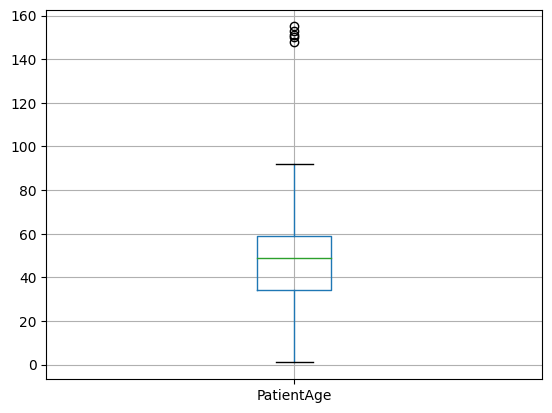

In [144]:
target_prediction.boxplot(column = 'PatientAge')

In [147]:
# Cleaning Data
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    upper_range = Q3 + (1.5*IQR)
    col = np.where(col>upper_range,np.nan,col)
    return col
target_prediction['PatientAge'] = remove_outlier(target_prediction['PatientAge'])
target_prediction.dropna(inplace=True)

<AxesSubplot:>

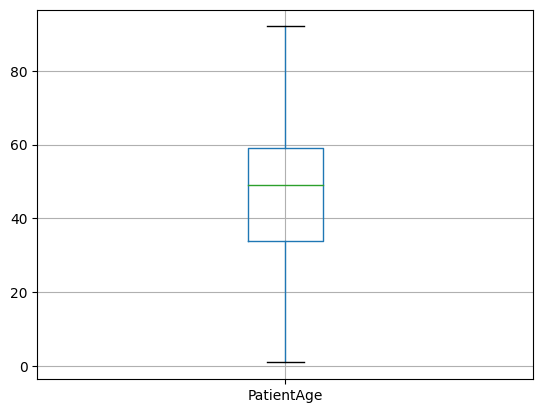

In [148]:
target_prediction.boxplot(column = 'PatientAge')

In [150]:
target_prediction.head(10)

,patientId,Target,class,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,No Lung Opacity / Not Normal,51.0,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,No Lung Opacity / Not Normal,48.0,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,No Lung Opacity / Not Normal,19.0,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal,28.0,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,32.0,F,AP
5,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,32.0,F,AP
6,00569f44-917d-4c86-a842-81832af98c30,0,No Lung Opacity / Not Normal,54.0,M,AP
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0,No Lung Opacity / Not Normal,78.0,M,PA
8,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity,75.0,M,PA
9,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity,75.0,M,PA


In [151]:
dummies = pd.get_dummies(target_prediction, columns = ['PatientSex','ViewPosition'])

In [154]:
dummies.head(10)

,patientId,Target,class,PatientAge,PatientSex_F,PatientSex_M,ViewPosition_AP,ViewPosition_PA
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,2,No Lung Opacity / Not Normal,51.0,1,0,0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,2,No Lung Opacity / Not Normal,48.0,1,0,0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,2,No Lung Opacity / Not Normal,19.0,0,1,1,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal,28.0,0,1,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,32.0,1,0,1,0
5,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,32.0,1,0,1,0
6,00569f44-917d-4c86-a842-81832af98c30,2,No Lung Opacity / Not Normal,54.0,0,1,1,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,2,No Lung Opacity / Not Normal,78.0,0,1,0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity,75.0,0,1,0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,1,Lung Opacity,75.0,0,1,0,1


In [152]:
df = dummies 
df['Target'][df['class']== "No Lung Opacity / Not Normal"] = 2
df
target_prediction = df.drop(['class'], axis =1)
target_prediction
target_prediction.to_csv("Cleaned_Data_Final.csv")

C:\Users\U1138371\AppData\Local\Temp\ipykernel_11648\235719502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'][df['class']== "No Lung Opacity / Not Normal"] = 2


In [153]:
X = dummies.drop(['Target', 'patientId'], axis = 1)
y = dummies[['Target']]
dummies

,patientId,Target,class,PatientAge,PatientSex_F,PatientSex_M,ViewPosition_AP,ViewPosition_PA
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,2,No Lung Opacity / Not Normal,51.0,1,0,0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,2,No Lung Opacity / Not Normal,48.0,1,0,0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,2,No Lung Opacity / Not Normal,19.0,0,1,1,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,Normal,28.0,0,1,0,1
4,00436515-870c-4b36-a041-de91049b9ab4,1,Lung Opacity,32.0,1,0,1,0
...,...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,1,Lung Opacity,54.0,0,1,1,0
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,0,Normal,46.0,1,0,0,1
30224,c1f6b555-2eb1-4231-98f6-50a963976431,0,Normal,45.0,0,1,0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,1,Lung Opacity,72.0,1,0,1,0


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =1 )

In [86]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
model.score(X_train, y_train)

0.7035636638623688

In [88]:
model.score(X_test, y_test)

0.7008490462013452

In [89]:
# Visualizing the decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns.values.tolist(),  
                   class_names=["0","1"],
                   filled=True)

plt.savefig('tree.png')

In [90]:
y.columns.values.tolist()

['Target']

In [91]:
model.predict_proba(X_test.iloc[[1]])

array([[0.8938458, 0.1061542]])